In [920]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Data Structure and Content

In [921]:
data=pd.read_csv('Train.csv')

In [922]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [923]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [924]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [925]:
for column in data.columns:
    print(f"Feature: {column}")
    print(data[column].value_counts())
    print("\n")

Feature: Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Feature: Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Feature: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Feature: Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Feature: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned       

# EDA

## Univariate analysis

### Target

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


<ipython-input-926-f35518440d3c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales']);


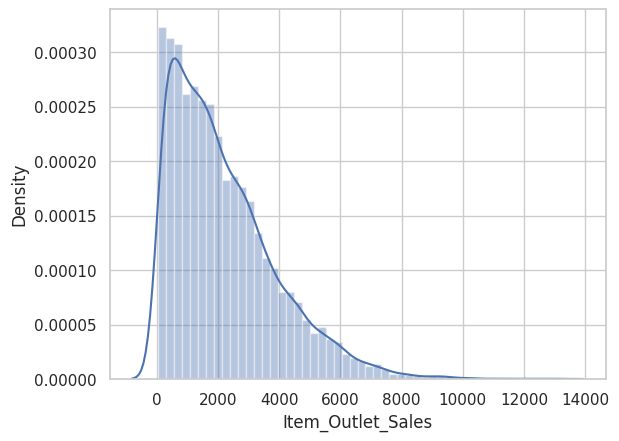

In [926]:
print(data['Item_Outlet_Sales'].describe())
sns.distplot(data['Item_Outlet_Sales']);

In [927]:
print(skew(data.Item_Outlet_Sales, axis=0, bias=True))
print(kurtosis(data.Item_Outlet_Sales, axis=0, bias=True))

1.1773233539676373
1.6142249915903424


<ipython-input-928-7cece209af74>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'], fit=norm);


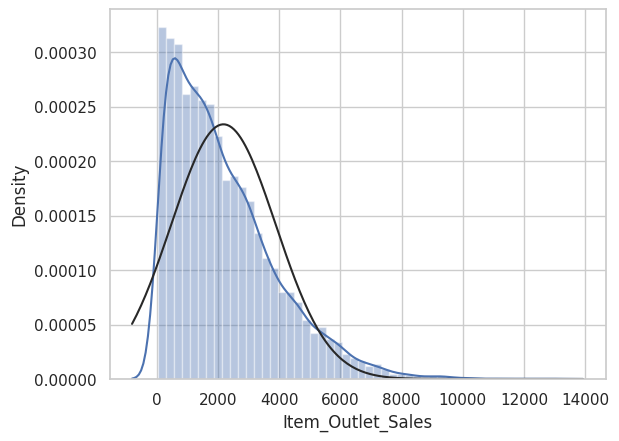

<Figure size 640x480 with 0 Axes>

In [928]:
sns.distplot(data['Item_Outlet_Sales'], fit=norm);
fig = plt.figure()

<Axes: >

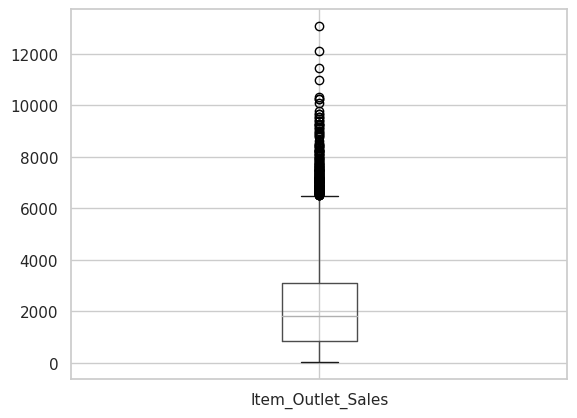

In [929]:
data.boxplot(column = "Item_Outlet_Sales")

### Item_Fat_Content

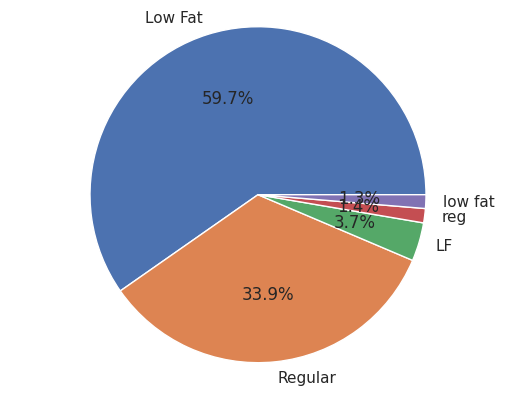

In [930]:
field_counts = data['Item_Fat_Content'].value_counts()
labels = field_counts.index
sizes = field_counts.values
color_palette = sns.color_palette()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=color_palette)
plt.axis('equal')
plt.show()

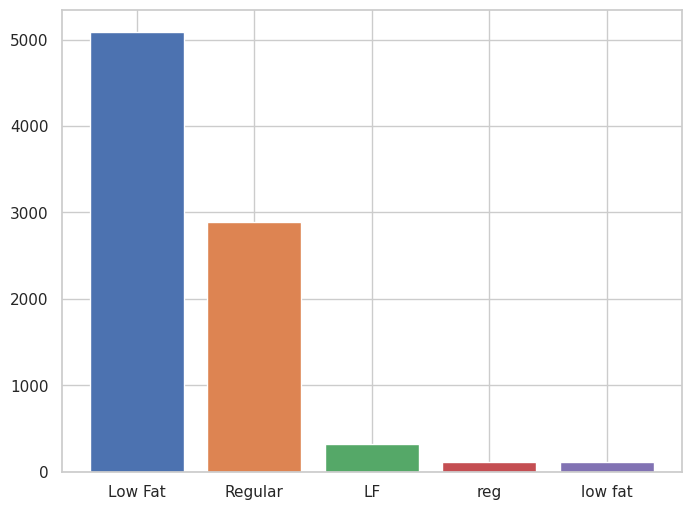

In [931]:
plt.figure(figsize=(8, 6))
bars = plt.bar(field_counts.index, field_counts.values,color=color_palette)

### Item_Weight

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


<ipython-input-932-20e5f84c615c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight']);


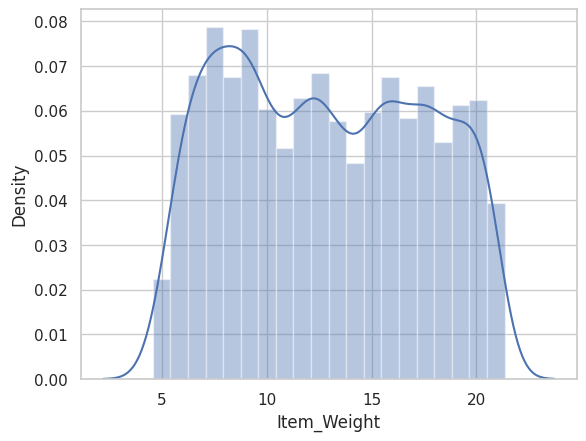

In [932]:
print(data['Item_Weight'].describe())
sns.distplot(data['Item_Weight']);

<Axes: >

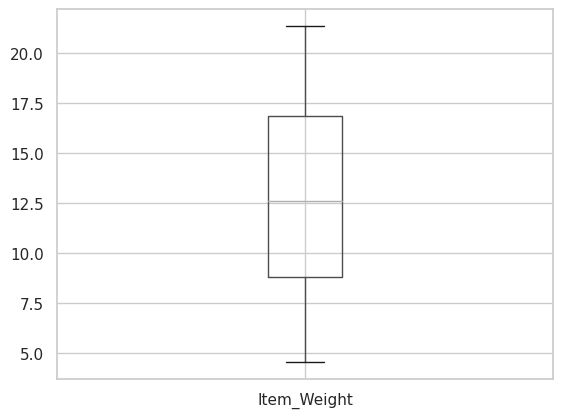

In [933]:
data.boxplot(column = "Item_Weight")

### Item_Visibility

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


<ipython-input-934-d60d12567ed4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility']);


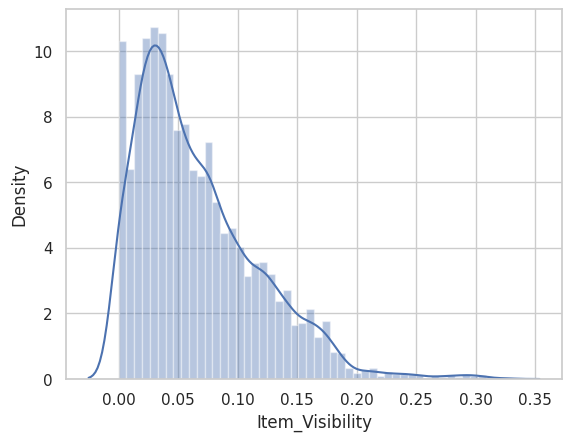

In [934]:
print(data['Item_Visibility'].describe())
sns.distplot(data['Item_Visibility']);

<Axes: >

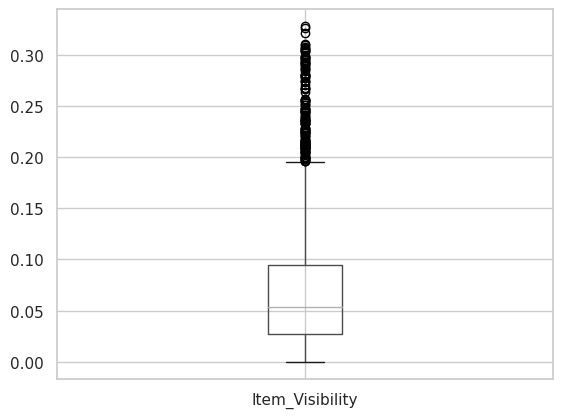

In [935]:
data.boxplot(column = "Item_Visibility")

### Item_Type

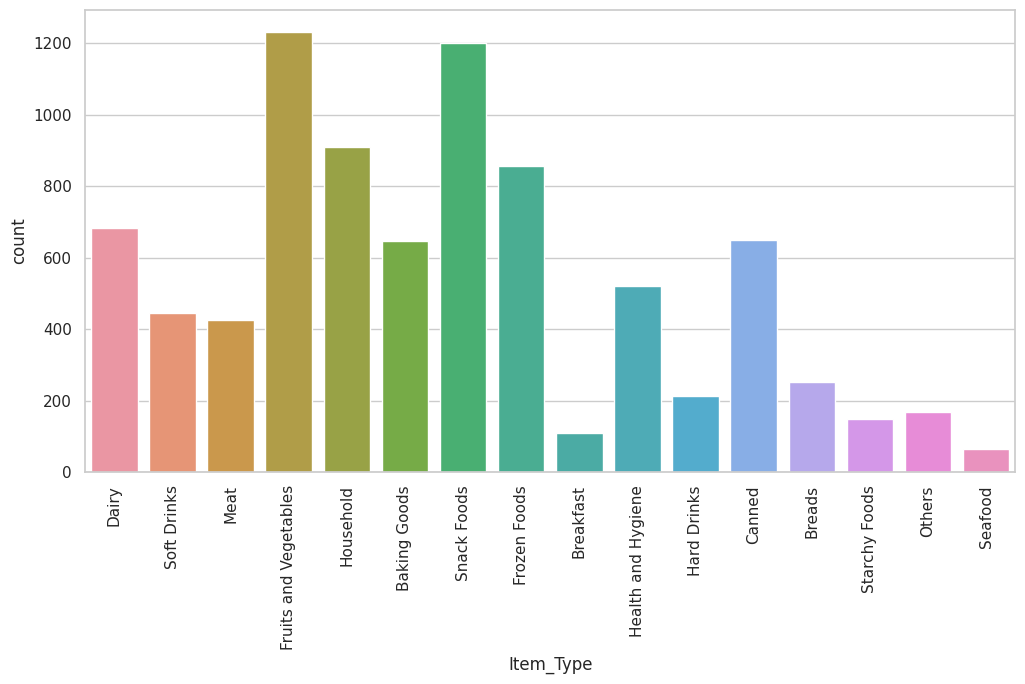

In [936]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Item_Type')
plt.xticks(rotation=90)  # Fait pivoter les étiquettes à 90 degrés
plt.show()


### Item_MRP

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


<ipython-input-937-91725b8d6805>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP']);


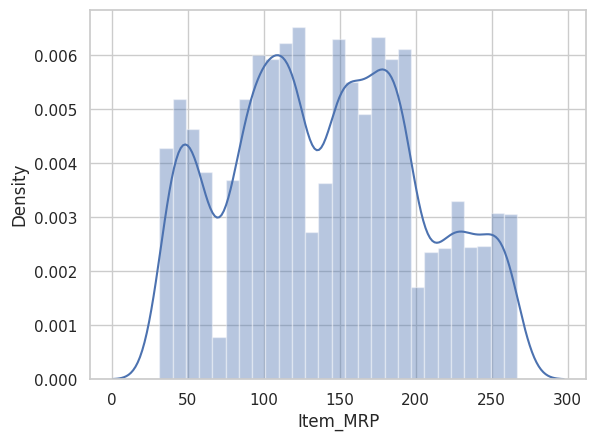

In [937]:
print(data['Item_MRP'].describe())
sns.distplot(data['Item_MRP']);

<Axes: >

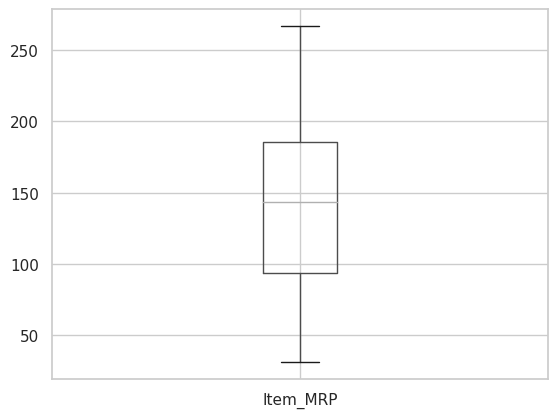

In [938]:
data.boxplot(column = "Item_MRP")

### Outlet_Identifier

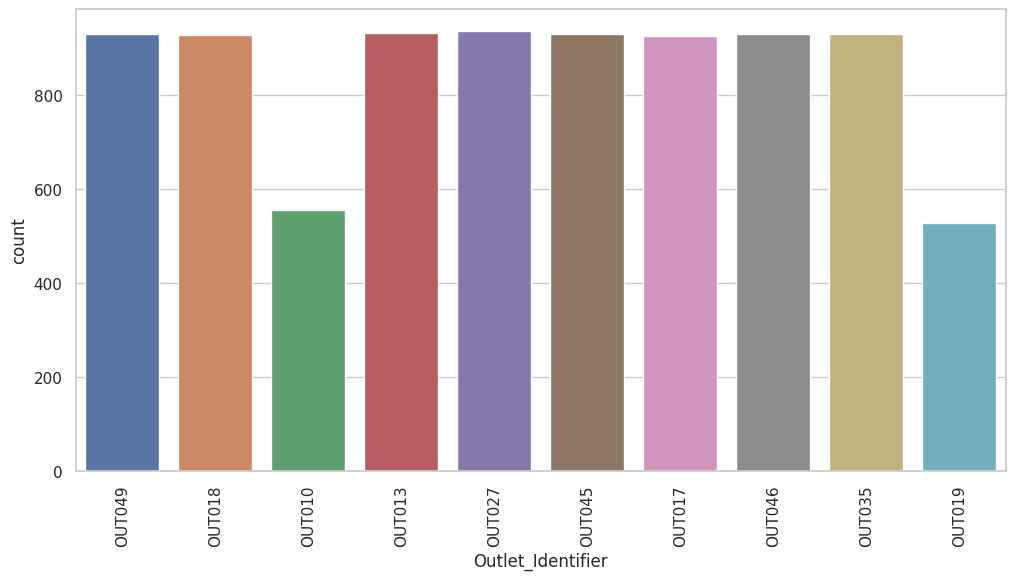

In [939]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Outlet_Identifier')
plt.xticks(rotation=90)  # Fait pivoter les étiquettes à 90 degrés
plt.show()

### Outlet_Establishement_Year

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


<ipython-input-940-d1040ba823fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Outlet_Establishment_Year']);


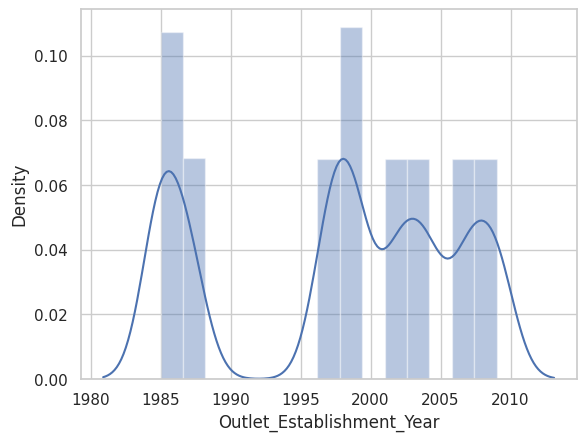

In [940]:
print(data['Outlet_Establishment_Year'].describe())
sns.distplot(data['Outlet_Establishment_Year']);


<Axes: >

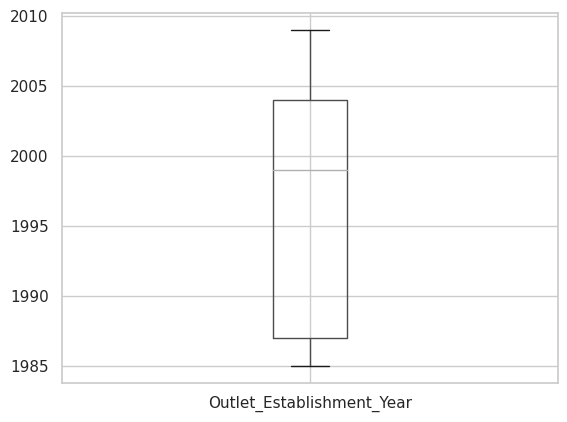

In [941]:
data.boxplot(column = "Outlet_Establishment_Year")

### Outlet_Location_Type

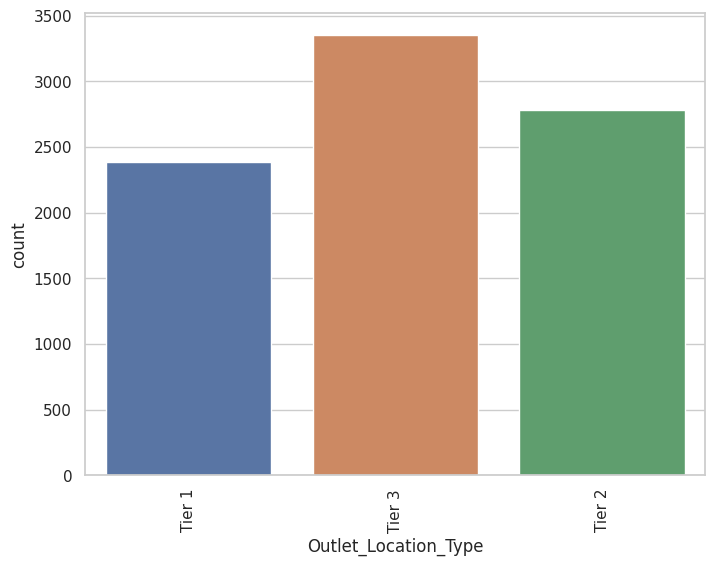

In [942]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xticks(rotation=90)  # Fait pivoter les étiquettes à 90 degrés
plt.show()

### Outlet_Type

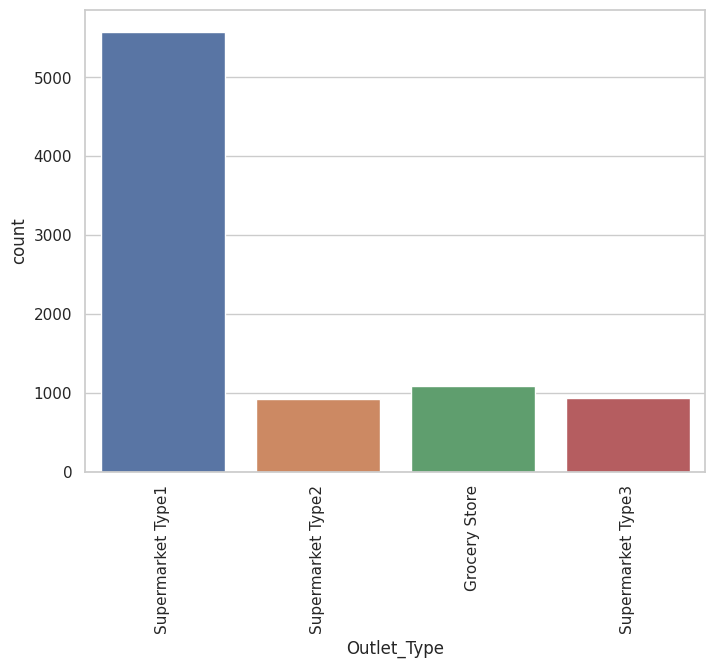

In [943]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Outlet_Type')
plt.xticks(rotation=90)
plt.show()

### Outlet_Size

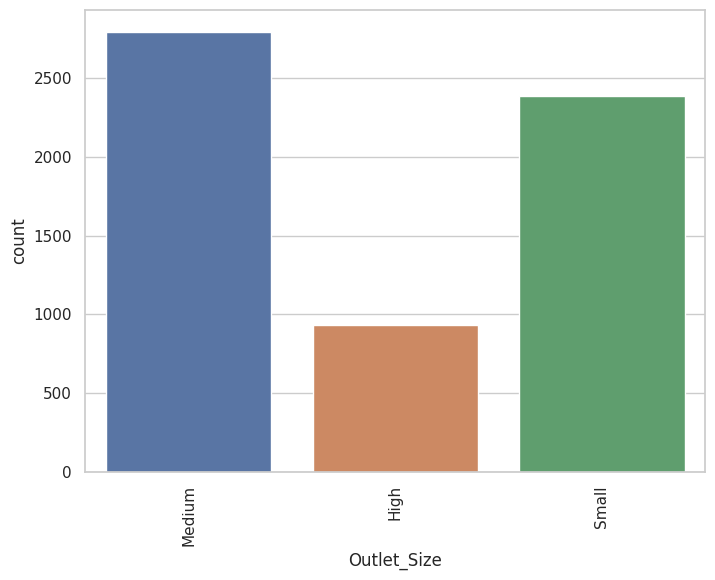

In [944]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Outlet_Size')
plt.xticks(rotation=90)  # Fait pivoter les étiquettes à 90 degrés
plt.show()

## Bivariante Analysis

### Numerical-Numerical

In [945]:
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [946]:
#correletion matrix
correlation = numerical.dropna().corr()
correlation

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.006061   
Item_MRP                      0.027141        -0.006061  1.000000   
Outlet_Establishment_Year    -0.011588        -0.016935 -0.001657   
Item_Outlet_Sales             0.014123        -0.085334  0.620961   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.016935          -0.085334  
Item_MRP                                   -0.001657           0.620961  
Outlet_Establishment_Year                   1.000000           0.012212  
Item_Outlet_Sales                           0.012212           1.000000

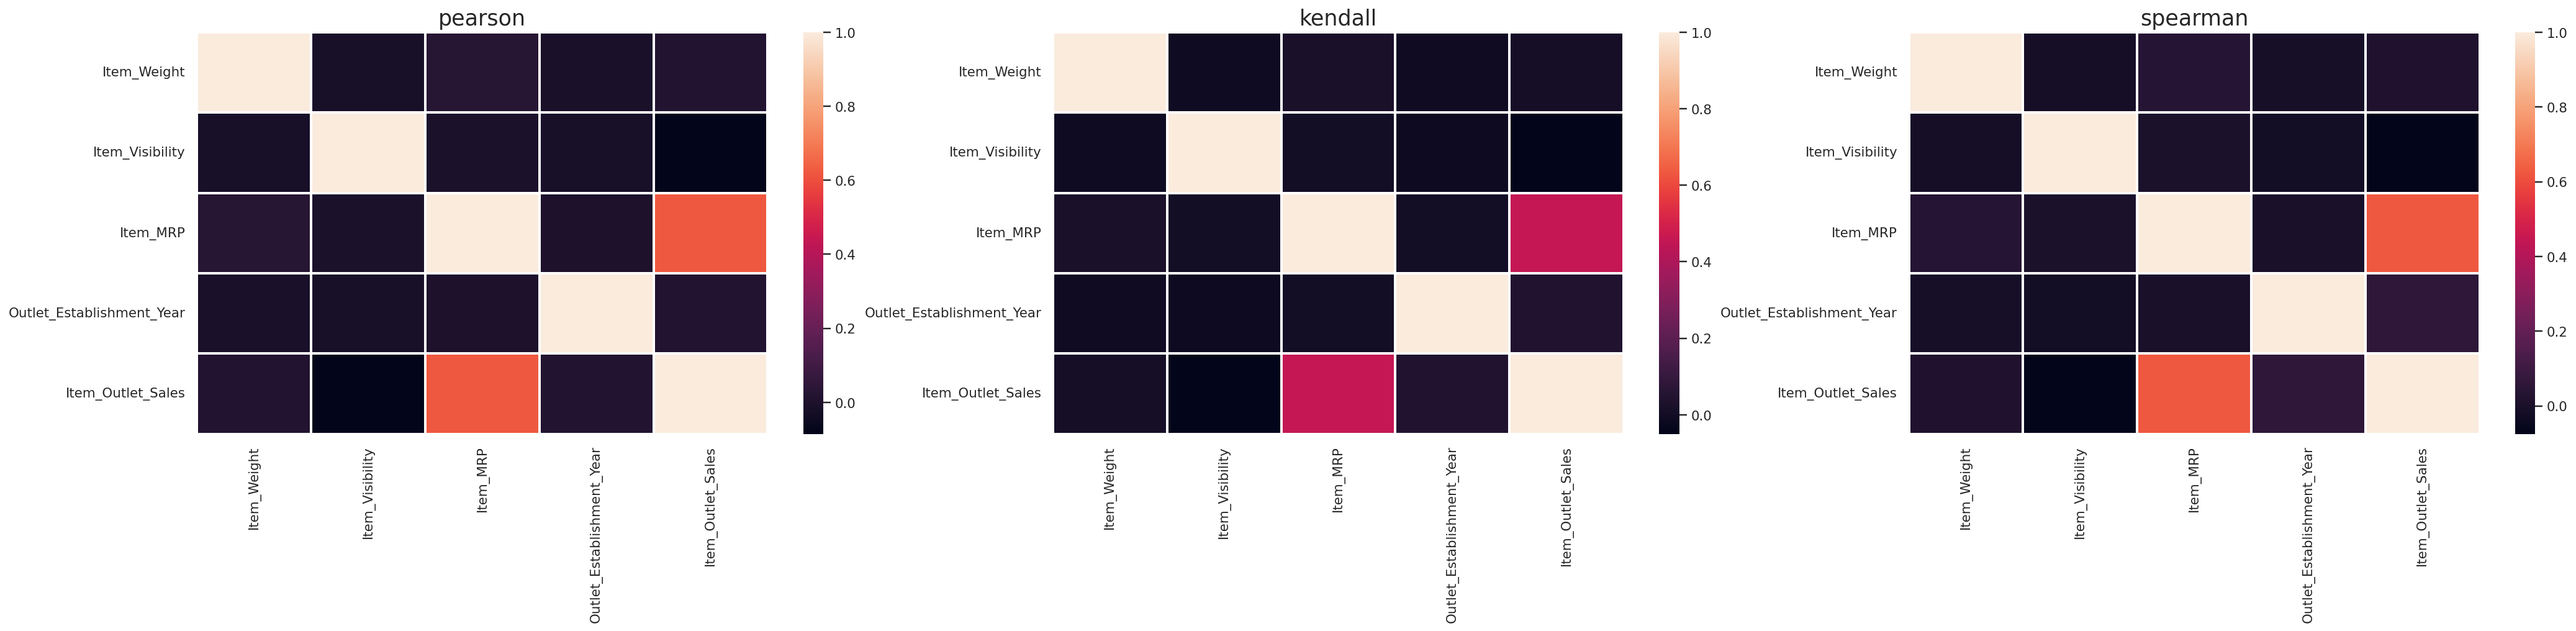

In [947]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

<Figure size 896x672 with 0 Axes>

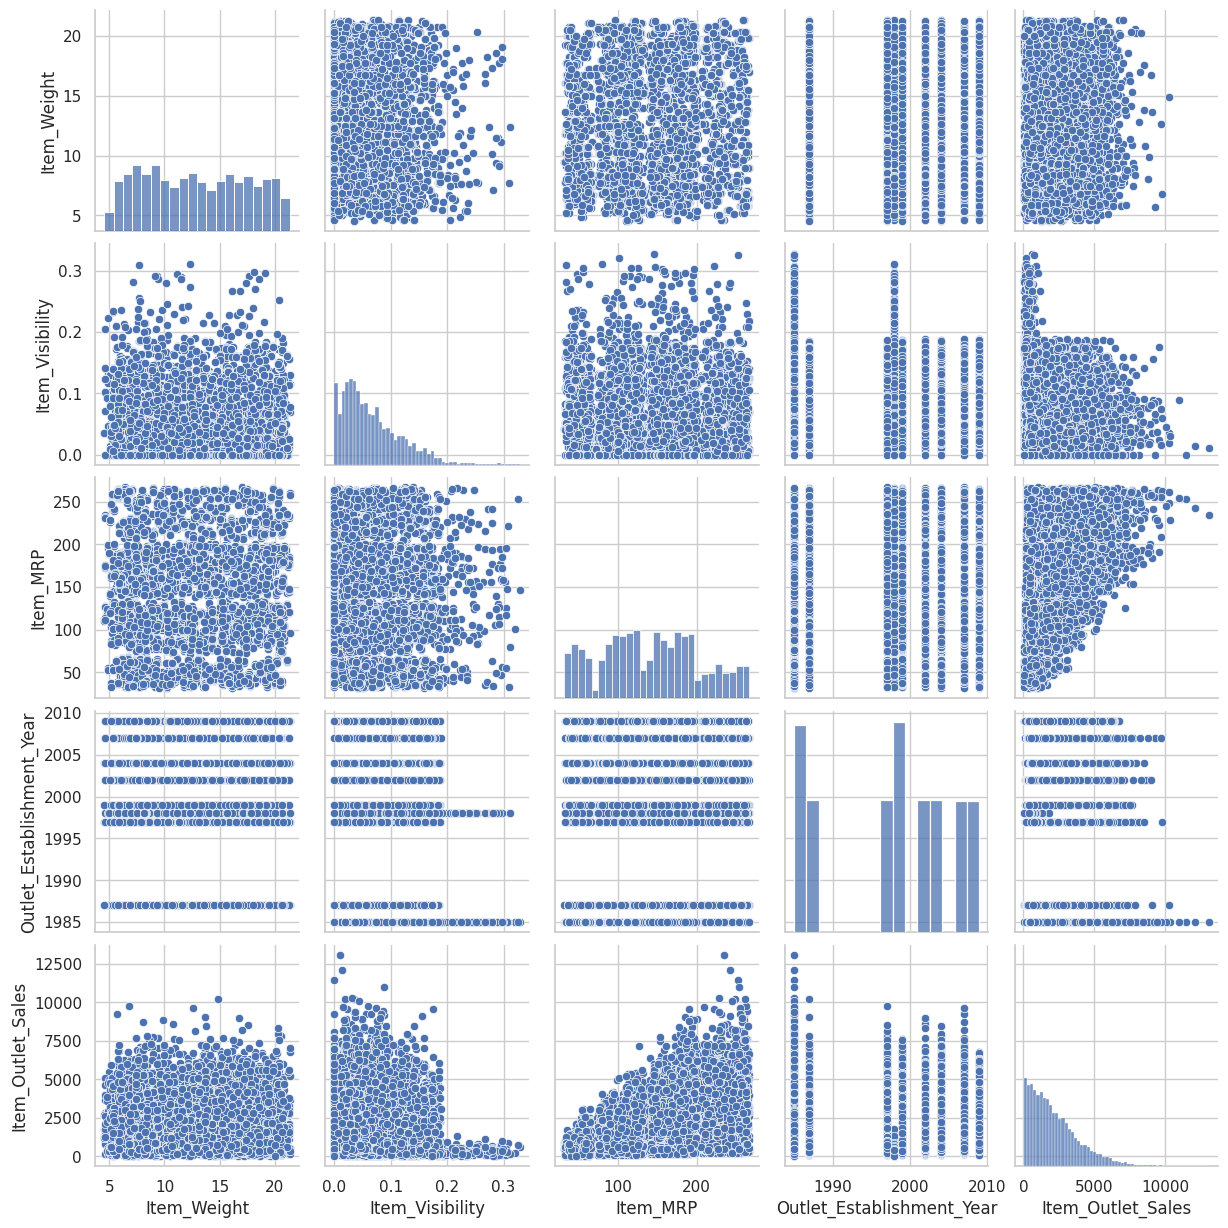

In [948]:
plt.figure(dpi=140)
sns.pairplot(numerical)
plt.show()

### Numerical & Categorical

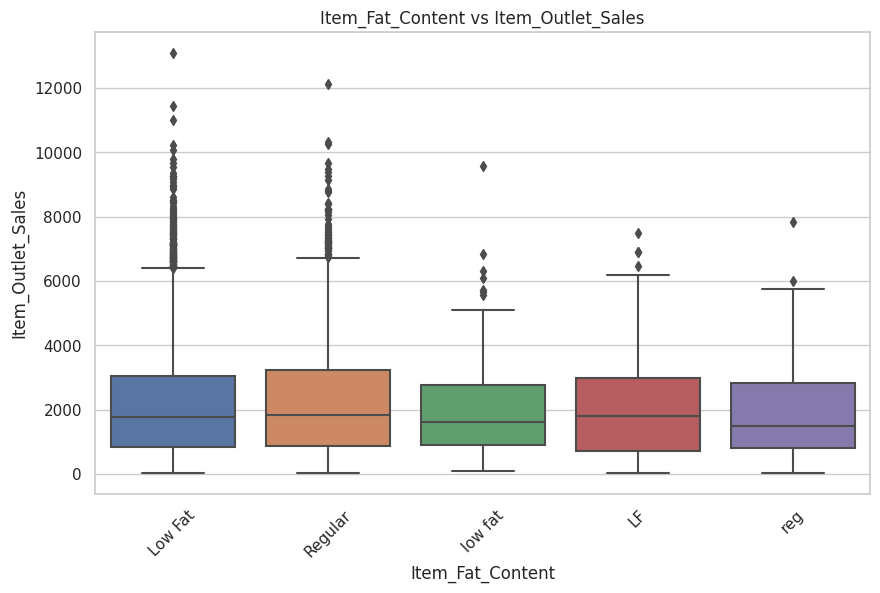

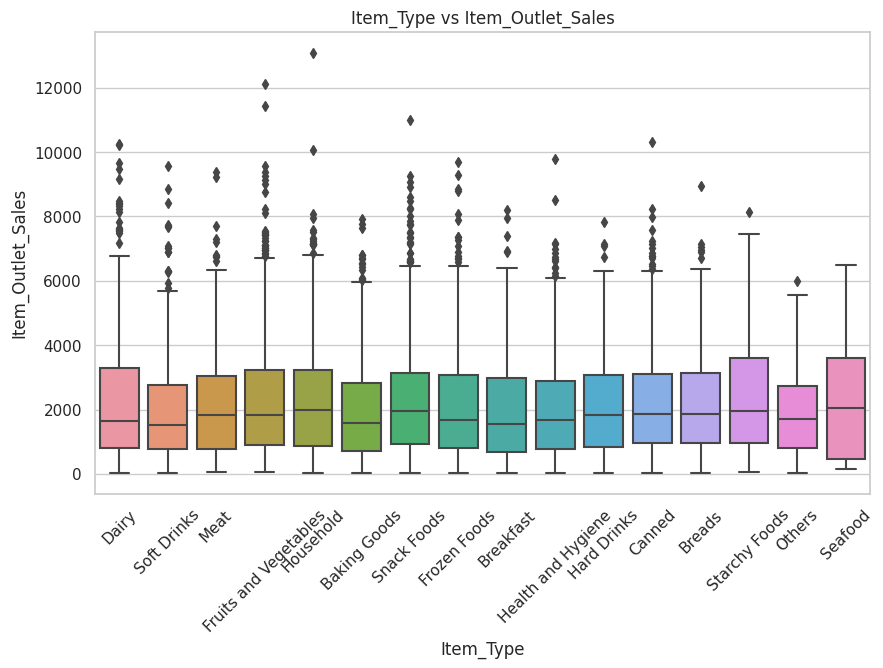

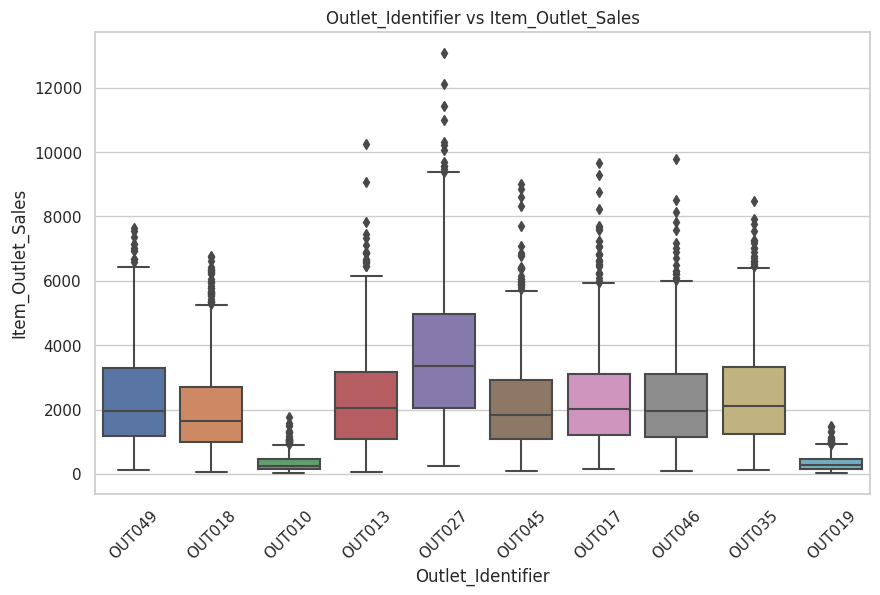

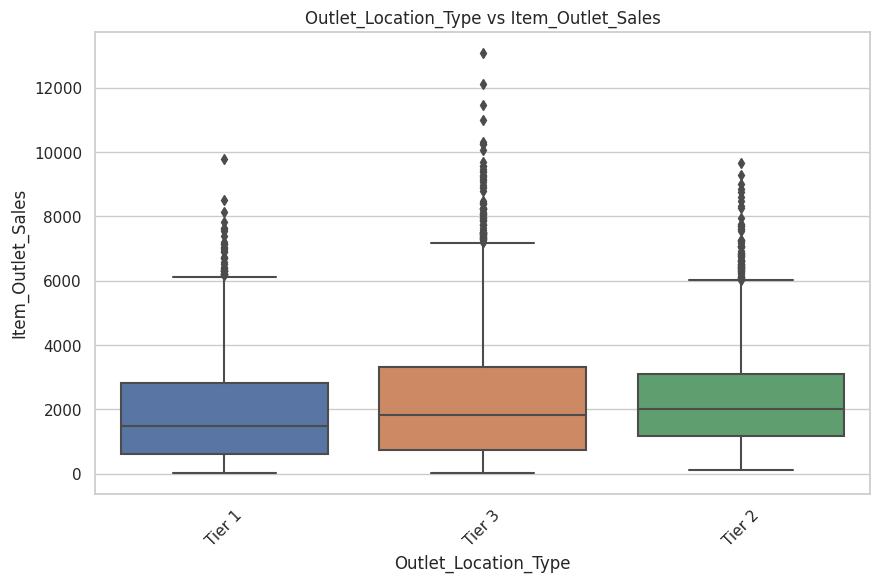

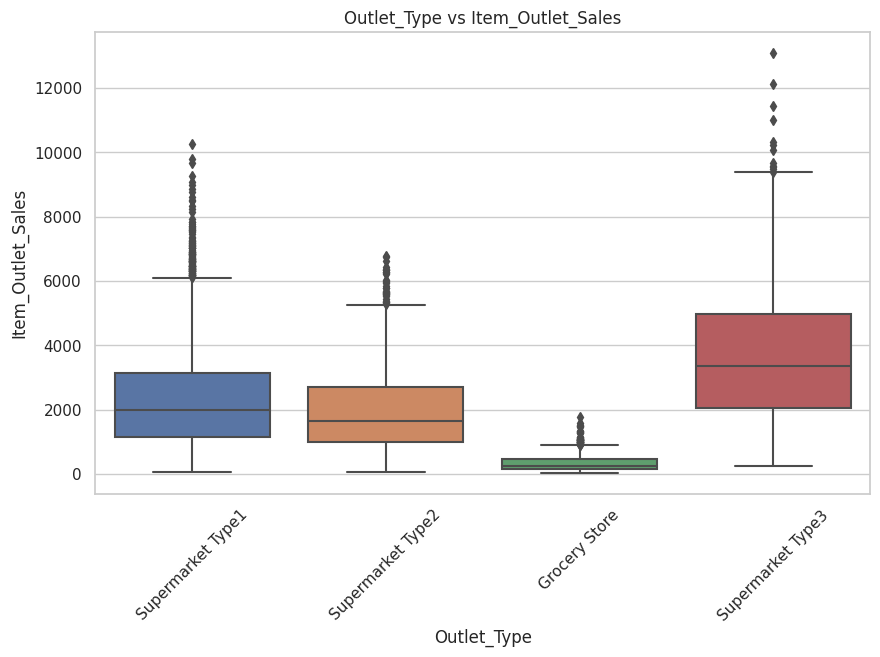

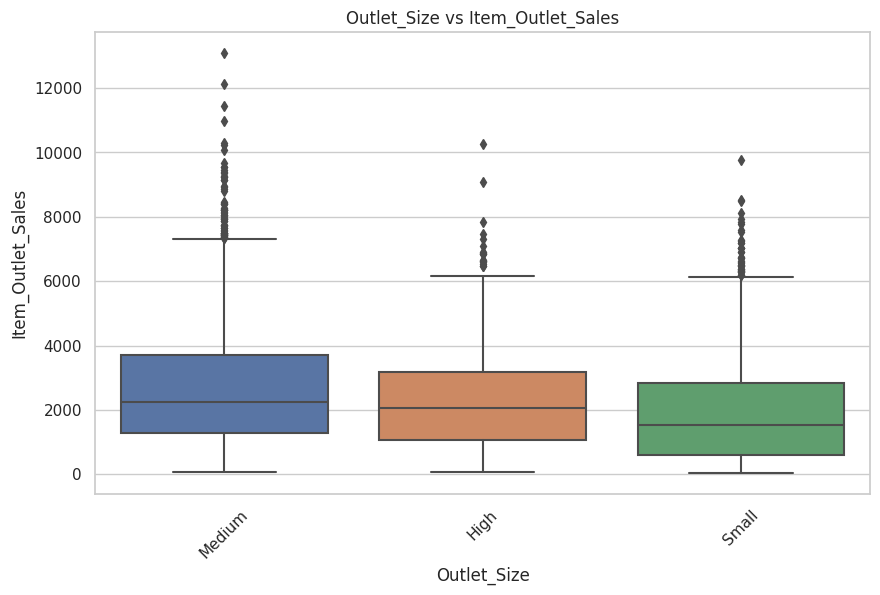

In [949]:
# Visualisation de la relation entre les variables catégorielles et "Item_Outlet_Sales"
categorical_columns = ['Item_Fat_Content', 'Item_Type','Outlet_Identifier' ,'Outlet_Location_Type', 'Outlet_Type','Outlet_Size']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Item_Outlet_Sales', data=data)
    plt.title(f'{column} vs Item_Outlet_Sales')
    plt.xticks(rotation=45)
    plt.show()



### Categorical & Categorical

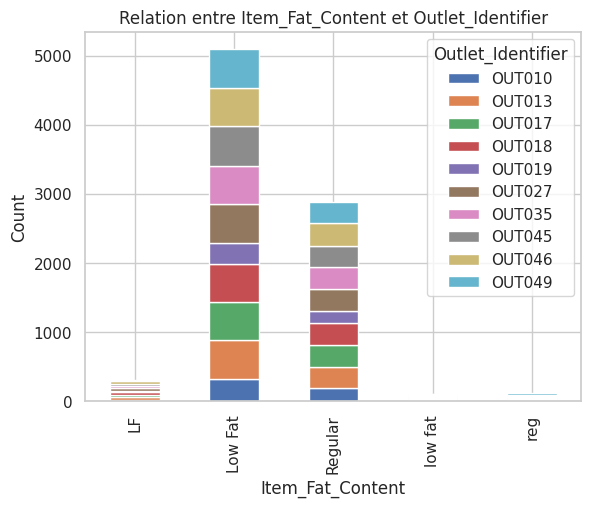

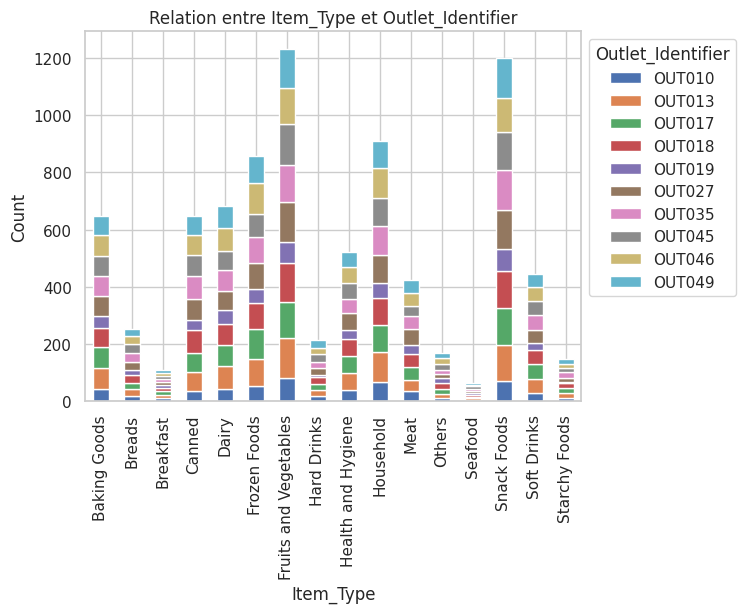

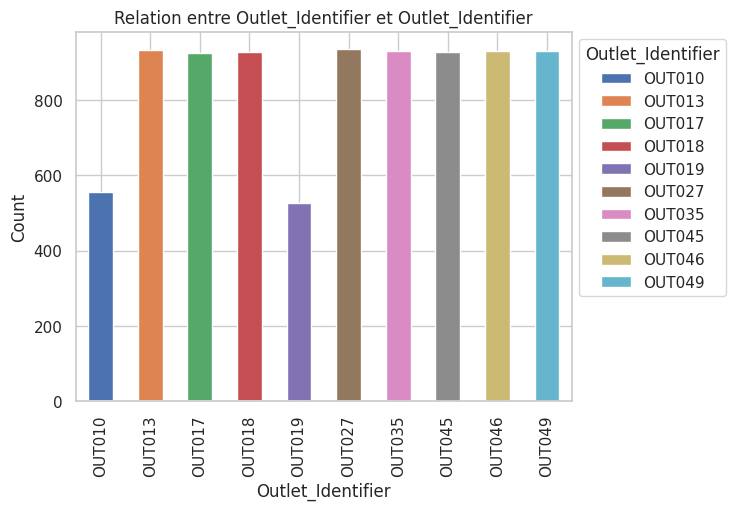

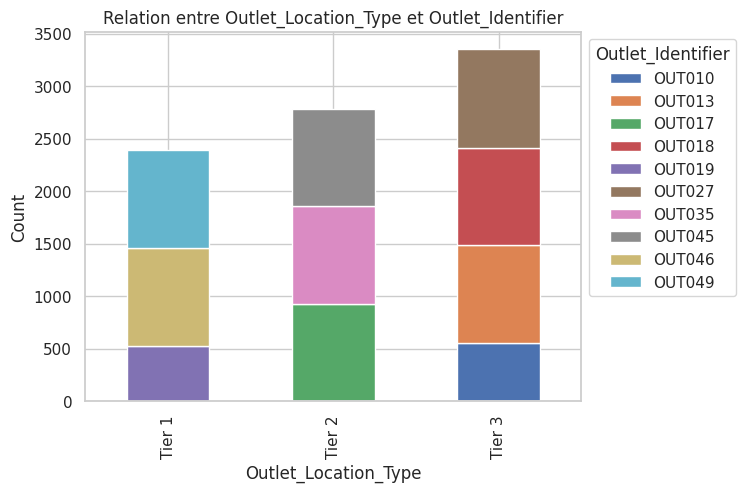

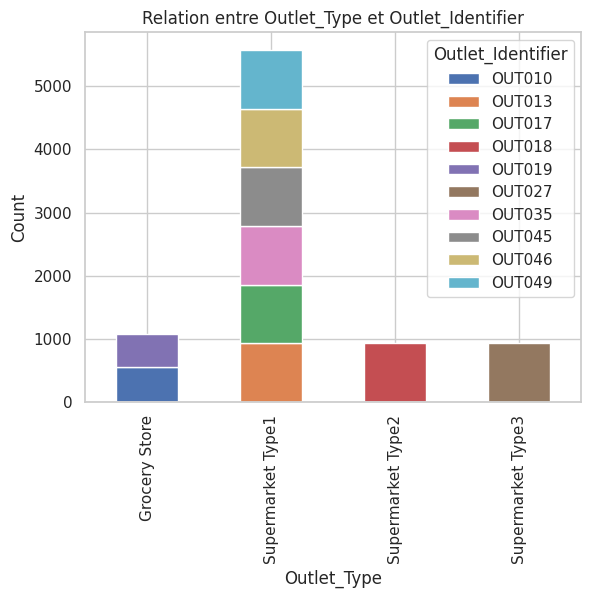

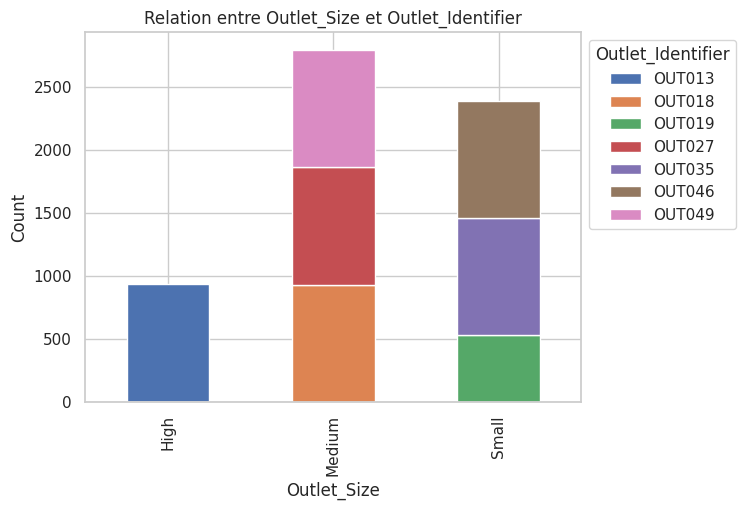

In [950]:
target_column = 'Outlet_Identifier'
for cat_column in categorical_columns:
    contingency_table = pd.crosstab(data[cat_column], data[target_column])
    contingency_table.plot(kind='bar', stacked=True)
    plt.xlabel(cat_column)
    plt.ylabel('Count')
    plt.title(f'Relation entre {cat_column} et {target_column}')
    plt.legend(title=target_column, bbox_to_anchor=(1, 1))
    plt.show()



## Outliers

In [951]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

number of outliers:144
max  outlier value:0.328390948
 min outlier value:0.196438668
49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64
-----------------
number of outliers:0
max  outlier value:nan
 min outlier value:nan
Series([], Name: Item_MRP, dtype: float64)
-----------------
number of outliers:186
max  outlier value:13086.9648
 min outlier value:6503.5344
43      6768.5228
130     7968.2944
132     6976.2524
145     7370.4060
203     6704.6060
          ...    
8245    7549.5062
8329    6630.0364
8350    7240.5750
8447    7588.1226
8510    7182.6504
Name: Item_Outlet_Sales, Length: 186, dtype: float64
-----------------
number of outliers:0
max  outlier value:nan
 min outlier value:nan
Series([], Name: Item_Weight, dtype: float64)
-----------------


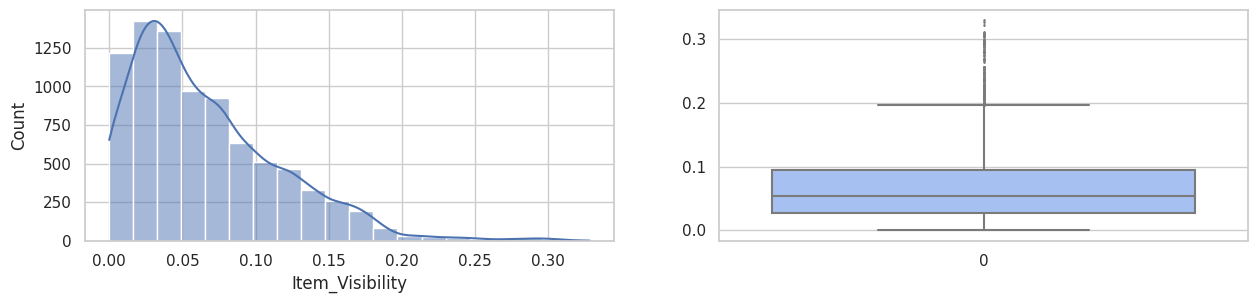

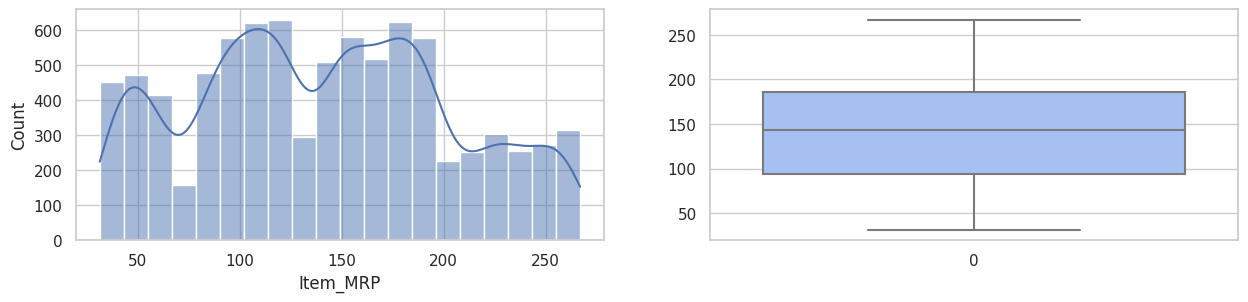

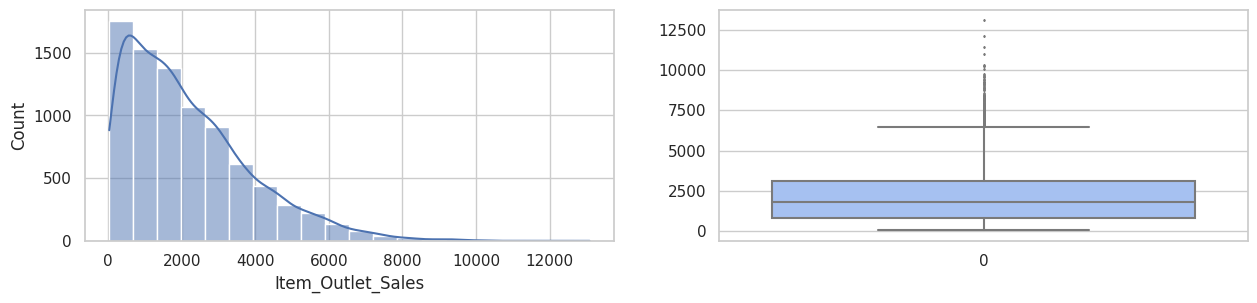

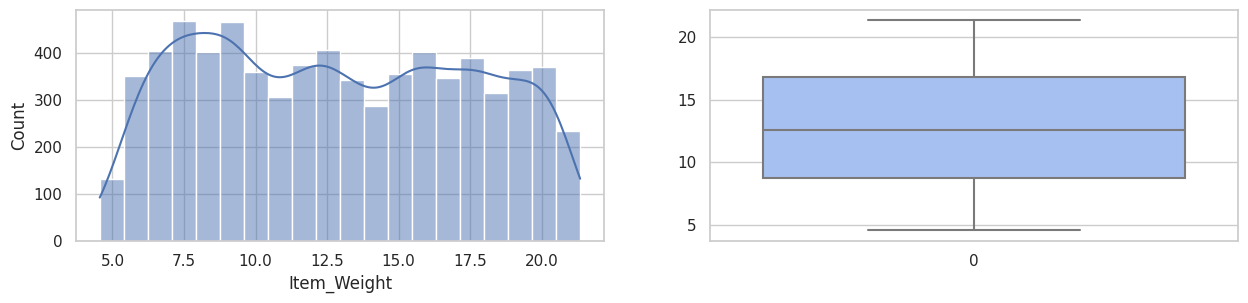

In [952]:

num_col = ["Item_Visibility","Item_MRP","Item_Outlet_Sales","Item_Weight"]

for i in num_col:
    outliers = find_outliers_IQR(data[i])
    print("number of outliers:" + str(len(outliers)))
    print("max  outlier value:"  + str(outliers.max()))
    print(" min outlier value:" + str(outliers.min()))
    print(outliers)
    print('-----------------')
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

In [953]:
features_with_outliers = ["Item_Visibility","Item_Outlet_Sales"]
for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

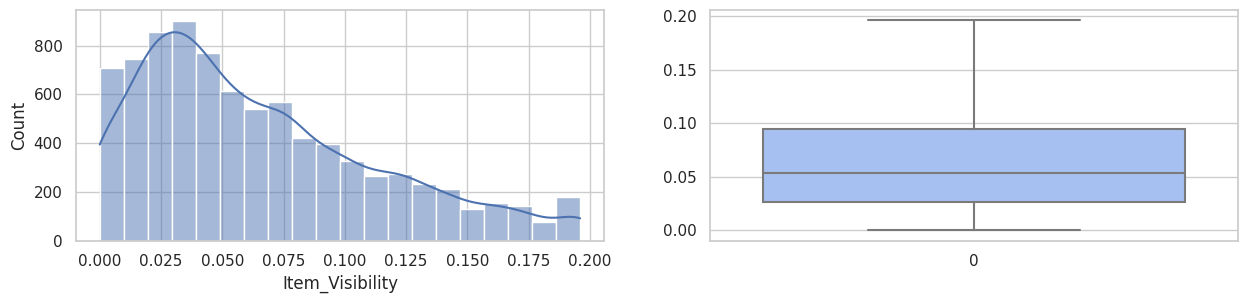

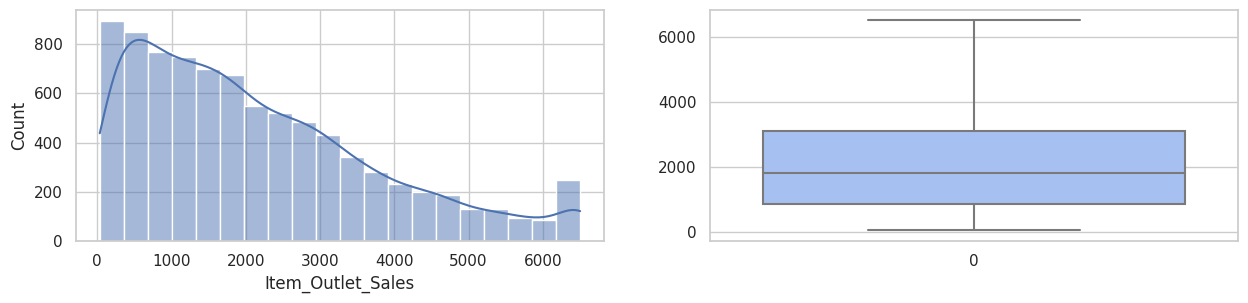

In [954]:
num_col = ["Item_Visibility","Item_Outlet_Sales"]

for i in num_col:

    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

# Missing Values

In [955]:
missing_values_count=data.isnull().sum()
missing_values_count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

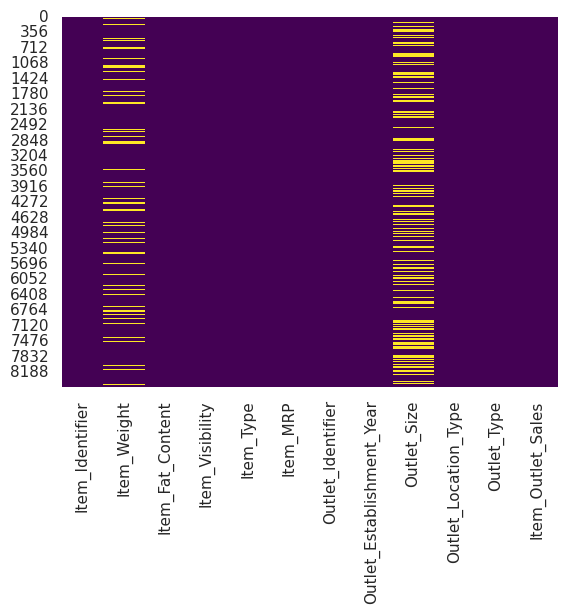

In [956]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [957]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

Total   Percent
Outlet_Size                 2410  0.282764
Item_Weight                 1463  0.171653
Item_Identifier                0  0.000000
Item_Fat_Content               0  0.000000
Item_Visibility                0  0.000000
Item_Type                      0  0.000000
Item_MRP                       0  0.000000
Outlet_Identifier              0  0.000000
Outlet_Establishment_Year      0  0.000000
Outlet_Location_Type           0  0.000000
Outlet_Type                    0  0.000000
Item_Outlet_Sales              0  0.000000

In [958]:
data = data.drop(['Outlet_Size','Item_Weight'],axis=1)
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Engineering

## Encoding Categorical Variables

In [959]:
data.drop("Item_Identifier", axis=1, inplace=True)
X= data
X1= data
y = data['Item_Outlet_Sales']
colonnes_categorielles = X.select_dtypes(include='object').columns.tolist()
colonnes_categorielles

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

### Label Encoding

In [960]:
le = LabelEncoder()

In [961]:
label_encoders = {}
for col in colonnes_categorielles:
    le = LabelEncoder()
    X1[col] = le.fit_transform(X1[col])
    label_encoders[col] = le
X1

Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0                    1         0.016047          4  249.8092   
1                    2         0.019278         14   48.2692   
2                    1         0.016760         10  141.6180   
3                    2         0.000000          6  182.0950   
4                    1         0.000000          9   53.8614   
...                ...              ...        ...       ...   
8518                 1         0.056783         13  214.5218   
8519                 2         0.046982          0  108.1570   
8520                 1         0.035186          8   85.1224   
8521                 2         0.145221         13  103.1332   
8522                 1         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  \
0                     9                       1999                     0   
1                     3                       2009                     2   
2                     9                       1999                     0   
3                     0                       1998                     2   
4                     1                       1987                     2   
...                 ...                        ...                   ...   
8518                  1                       1987                     2   
8519                  7                       2002                     1   
8520                  6                       2004                     1   
8521                  3                       2009                     2   
8522                  8                       1997                     0   

      Outlet_Type  Item_Outlet_Sales  
0               1          3735.1380  
1               2           443.4228  
2               1          2097.2700  
3               0           732.3800  
4               1           994.7052  
...           ...                ...  
8518            1          2778.3834  
8519            1           549.2850  
8520            1          1193.1136  
8521            2          1845.5976  
8522            1           765.6700  

[8523 rows x 9 columns]

### One Hot Encoding

In [962]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[colonnes_categorielles])
encoded_col_names = []
for i, col in enumerate(colonnes_categorielles):
    categories = encoder.categories_[i]
    encoded_col_names.extend([f'{col}_{category}' for category in categories[1:]])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_col_names)
X_numerical = X.drop(columns=colonnes_categorielles)
X_complete = pd.concat([X_numerical, X_encoded_df], axis=1)
X_complete

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales  \
0            0.016047  249.8092                       1999          3735.1380   
1            0.019278   48.2692                       2009           443.4228   
2            0.016760  141.6180                       1999          2097.2700   
3            0.000000  182.0950                       1998           732.3800   
4            0.000000   53.8614                       1987           994.7052   
...               ...       ...                        ...                ...   
8518         0.056783  214.5218                       1987          2778.3834   
8519         0.046982  108.1570                       2002           549.2850   
8520         0.035186   85.1224                       2004          1193.1136   
8521         0.145221  103.1332                       2009          1845.5976   
8522         0.044878   75.4670                       1997           765.6700   

      Item_Fat_Content_1  Item_Fat_Content_2  Item_Fat_Content_3  \
0                    1.0                 0.0                 0.0   
1                    0.0                 1.0                 0.0   
2                    1.0                 0.0                 0.0   
3                    0.0                 1.0                 0.0   
4                    1.0                 0.0                 0.0   
...                  ...                 ...                 ...   
8518                 1.0                 0.0                 0.0   
8519                 0.0                 1.0                 0.0   
8520                 1.0                 0.0                 0.0   
8521                 0.0                 1.0                 0.0   
8522                 1.0                 0.0                 0.0   

      Item_Fat_Content_4  Item_Type_1  Item_Type_2  ...  Outlet_Identifier_5  \
0                    0.0          0.0          0.0  ...                  0.0   
1                    0.0          0.0          0.0  ...                  0.0   
2                    0.0          0.0          0.0  ...                  0.0   
3                    0.0          0.0          0.0  ...                  0.0   
4                    0.0          0.0          0.0  ...                  0.0   
...                  ...          ...          ...  ...                  ...   
8518                 0.0          0.0          0.0  ...                  0.0   
8519                 0.0          0.0          0.0  ...                  0.0   
8520                 0.0          0.0          0.0  ...                  0.0   
8521                 0.0          0.0          0.0  ...                  0.0   
8522                 0.0          0.0          0.0  ...                  0.0   

      Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  0.0                  0.0   
3                     0.0                  0.0                  0.0   
4                     0.0                  0.0                  0.0   
...                   ...                  ...                  ...   
8518                  0.0                  0.0                  0.0   
8519                  0.0                  1.0                  0.0   
8520                  1.0                  0.0                  0.0   
8521                  0.0                  0.0                  0.0   
8522                  0.0                  0.0                  1.0   

      Outlet_Identifier_9  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                     1.0                     0.0                     0.0   
1                     0.0                     0.0                     1.0   
2                     1.0                     0.0                     0.0   
3                     0.0                     0.0                     1.0   
4                

### Train-Test Split

In [963]:
data_train, data_test = train_test_split(X1, train_size = 0.8,test_size=0.2, random_state=42)
data_train1, data_test1= train_test_split(X_complete,train_size = 0.8, test_size=0.2, random_state=42)

###  Feature scaling

In [964]:
scaler = MinMaxScaler()
column =data_train.columns
column1 =data_train1.columns
#train_data
data_train[column] = scaler.fit_transform(data_train[column])
data_train1[column1] = scaler.fit_transform(data_train1[column1])

In [965]:
data_train

Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
549               0.50         0.179641   0.400000  0.594464   
7757              0.25         0.242236   0.600000  0.591057   
764               0.50         0.388418   0.666667  0.341387   
6867              0.25         0.152288   0.400000  0.043819   
2716              0.25         0.700217   0.866667  0.527478   
...                ...              ...        ...       ...   
5734              0.50         1.000000   0.400000  0.457956   
5191              0.25         0.599934   0.333333  0.188359   
5390              0.25         0.096662   0.533333  0.874662   
860               0.75         0.277390   0.866667  0.367815   
7270              0.00         0.086709   0.600000  0.273563   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  \
549            1.000000                   0.583333                   0.0   
7757           0.777778                   0.708333                   0.5   
764            0.888889                   0.500000                   0.0   
6867           0.777778                   0.708333                   0.5   
2716           0.888889                   0.500000                   0.0   
...                 ...                        ...                   ...   
5734           0.000000                   0.541667                   1.0   
5191           0.222222                   0.916667                   0.5   
5390           0.777778                   0.708333                   0.5   
860            0.222222                   0.916667                   0.5   
7270           0.888889                   0.500000                   0.0   

      Outlet_Type  Item_Outlet_Sales  
549      0.333333           0.363749  
7757     0.333333           0.474705  
764      0.333333           0.168802  
6867     0.333333           0.038804  
2716     0.333333           0.647934  
...           ...                ...  
5734     0.000000           0.038289  
5191     0.333333           0.196078  
5390     0.333333           0.944882  
860      0.333333           0.249910  
7270     0.333333           0.144100  

[6818 rows x 9 columns]

In [966]:
data_train1

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales  \
549          0.179641  0.594464                   0.583333           0.363749   
7757         0.242236  0.591057                   0.708333           0.474705   
764          0.388418  0.341387                   0.500000           0.168802   
6867         0.152288  0.043819                   0.708333           0.038804   
2716         0.700217  0.527478                   0.500000           0.647934   
...               ...       ...                        ...                ...   
5734         1.000000  0.457956                   0.541667           0.038289   
5191         0.599934  0.188359                   0.916667           0.196078   
5390         0.096662  0.874662                   0.708333           0.944882   
860          0.277390  0.367815                   0.916667           0.249910   
7270         0.086709  0.273563                   0.500000           0.144100   

      Item_Fat_Content_1  Item_Fat_Content_2  Item_Fat_Content_3  \
549                  0.0                 1.0                 0.0   
7757                 1.0                 0.0                 0.0   
764                  0.0                 1.0                 0.0   
6867                 1.0                 0.0                 0.0   
2716                 1.0                 0.0                 0.0   
...                  ...                 ...                 ...   
5734                 0.0                 1.0                 0.0   
5191                 1.0                 0.0                 0.0   
5390                 1.0                 0.0                 0.0   
860                  0.0                 0.0                 1.0   
7270                 0.0                 0.0                 0.0   

      Item_Fat_Content_4  Item_Type_1  Item_Type_2  ...  Outlet_Identifier_5  \
549                  0.0          0.0          0.0  ...                  0.0   
7757                 0.0          0.0          0.0  ...                  0.0   
764                  0.0          0.0          0.0  ...                  0.0   
6867                 0.0          0.0          0.0  ...                  0.0   
2716                 0.0          0.0          0.0  ...                  0.0   
...                  ...          ...          ...  ...                  ...   
5734                 0.0          0.0          0.0  ...                  0.0   
5191                 0.0          0.0          0.0  ...                  0.0   
5390                 0.0          0.0          0.0  ...                  0.0   
860                  0.0          0.0          0.0  ...                  0.0   
7270                 0.0          0.0          0.0  ...                  0.0   

      Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
549                   0.0                  0.0                  0.0   
7757                  0.0                  1.0                  0.0   
764                   0.0                  0.0                  1.0   
6867                  0.0                  1.0                  0.0   
2716                  0.0                  0.0                  1.0   
...                   ...                  ...                  ...   
5734                  0.0                  0.0                  0.0   
5191                  0.0                  0.0                  0.0   
5390                  0.0                  1.0                  0.0   
860                   0.0                  0.0                  0.0   
7270                  0.0                  0.0                  1.0   

      Outlet_Identifier_9  Outlet_Location_Type_1  Outlet_Location_Type_2  \
549                   1.0                     0.0                     0.0   
7757                  0.0                     1.0                     0.0   
764                   0.0                     0.0                     0.0   
6867                  0.0                     1.0                     0.0   
2716             

In [967]:
#test_data
data_test[column] = scaler.fit_transform(data_test[column])
data_test1[column1] = scaler.fit_transform(data_test1[column1])

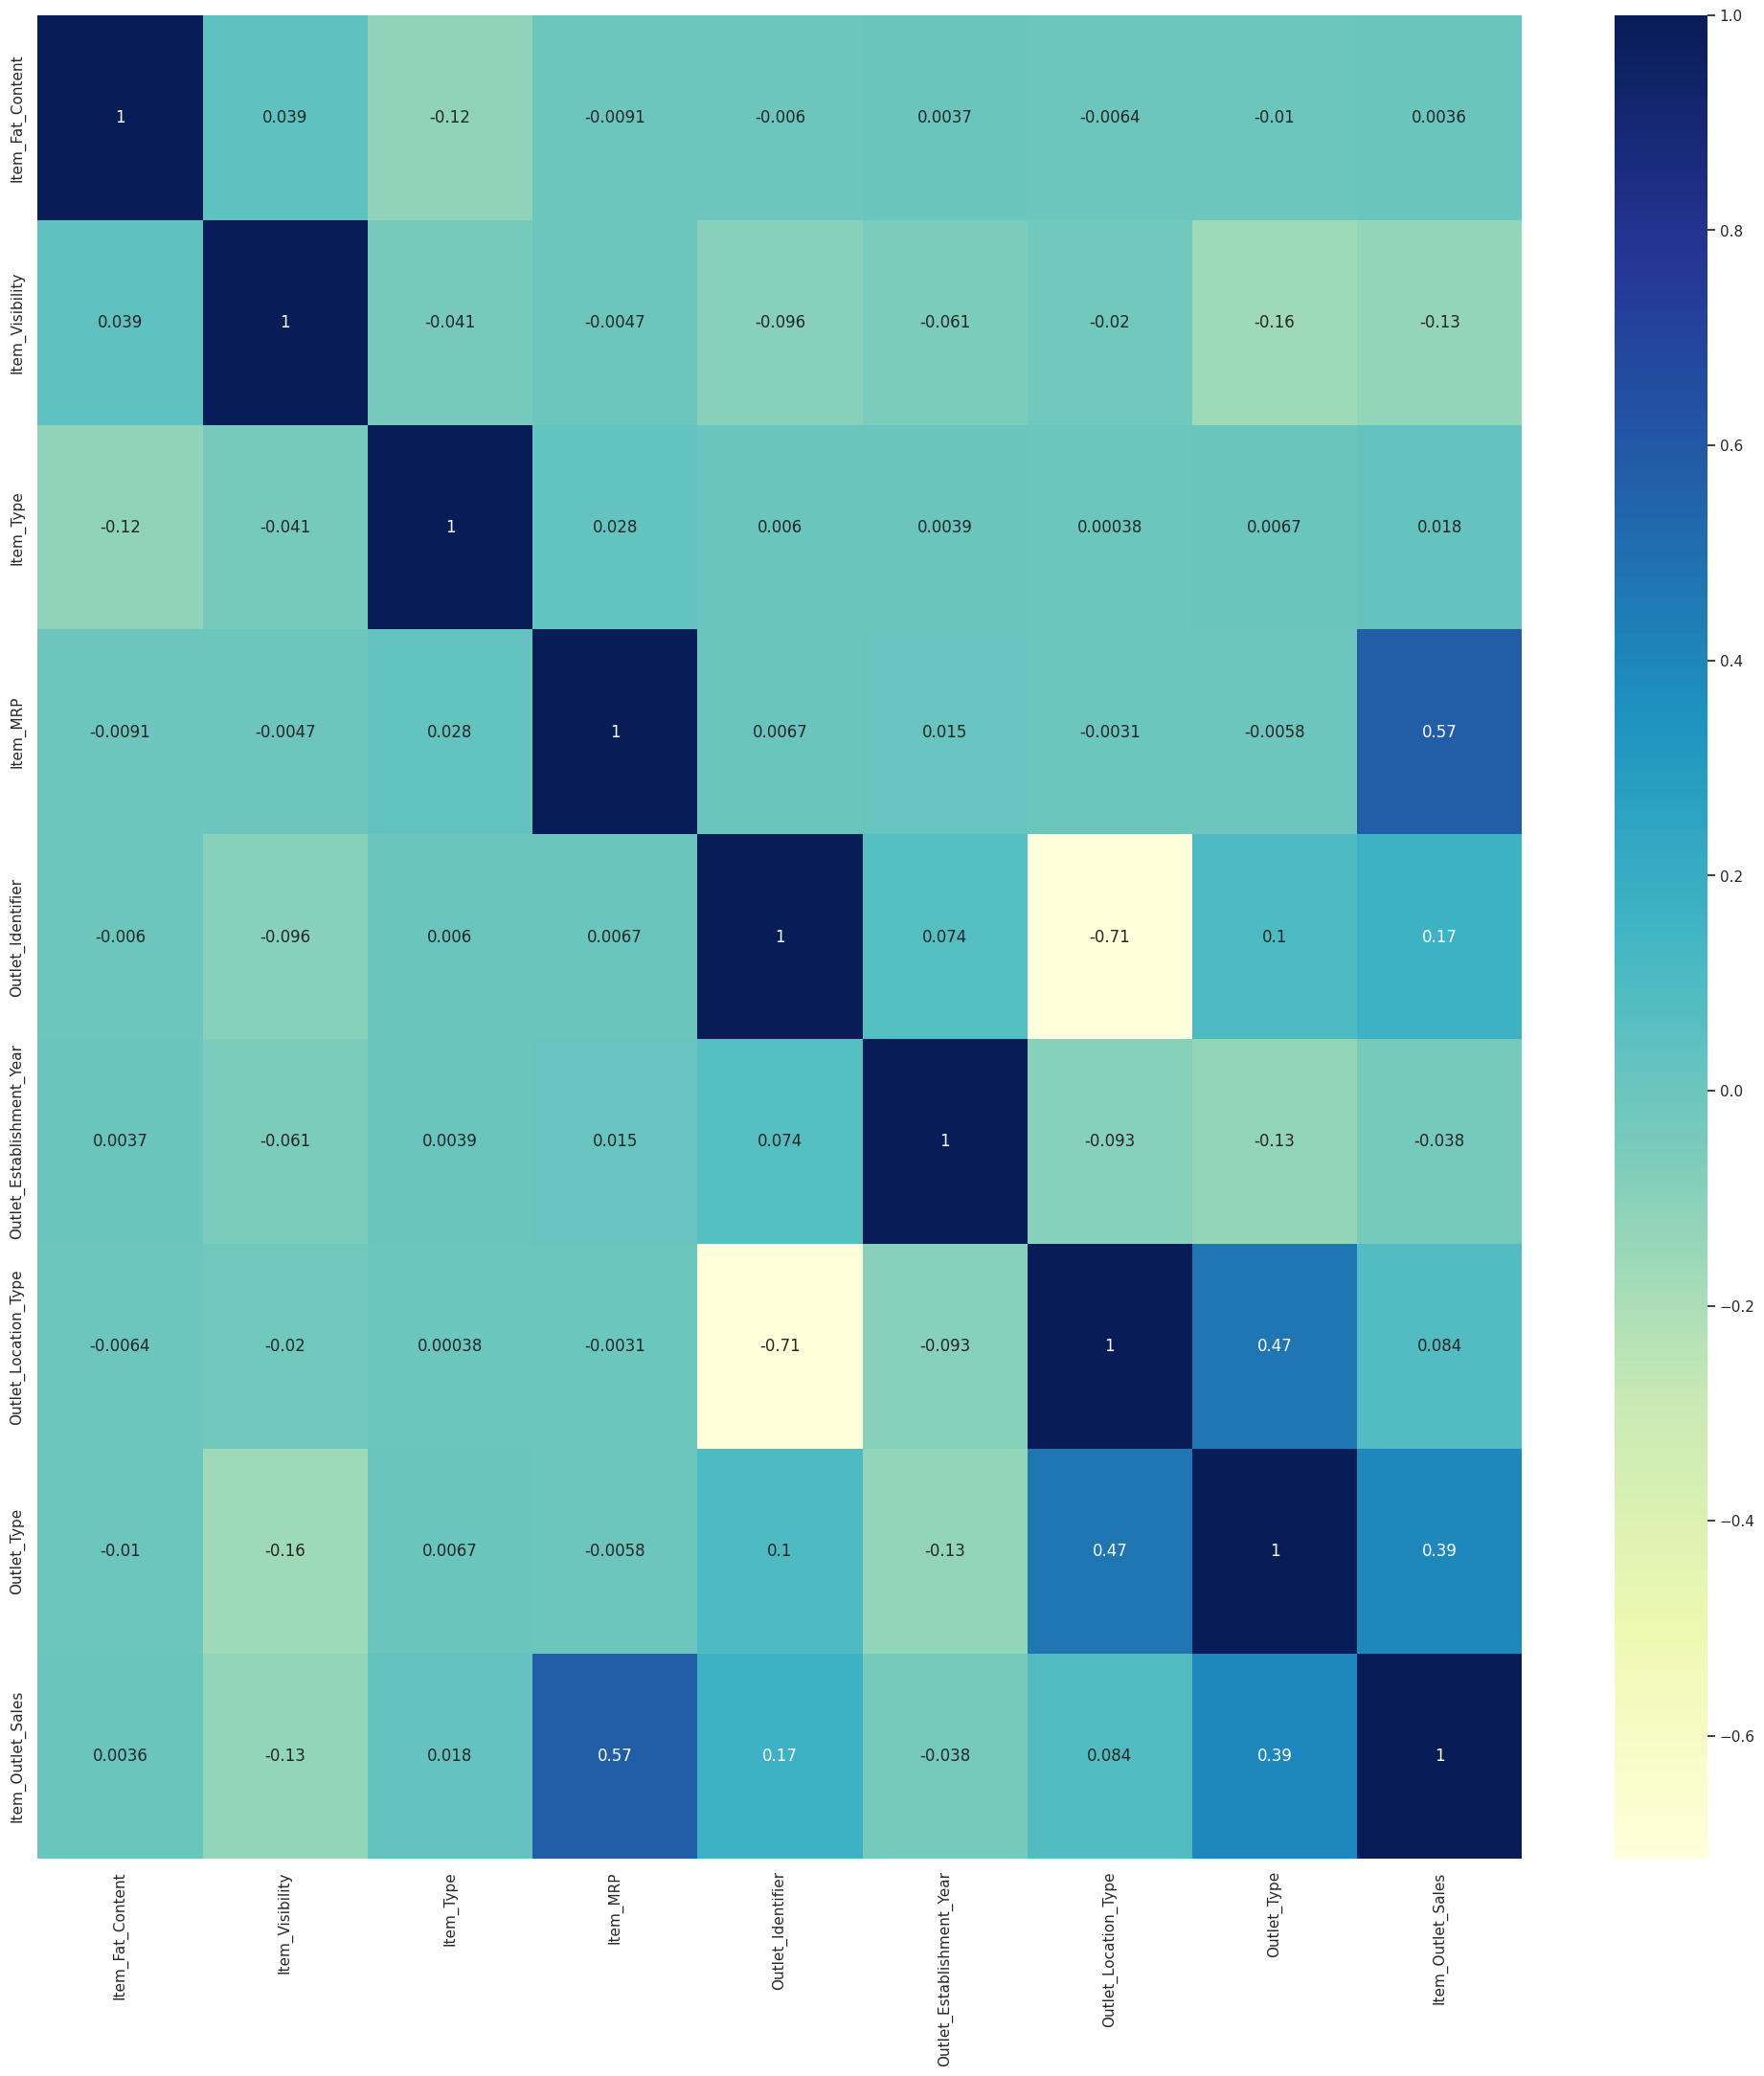

In [968]:
plt.figure(figsize = (25, 25))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

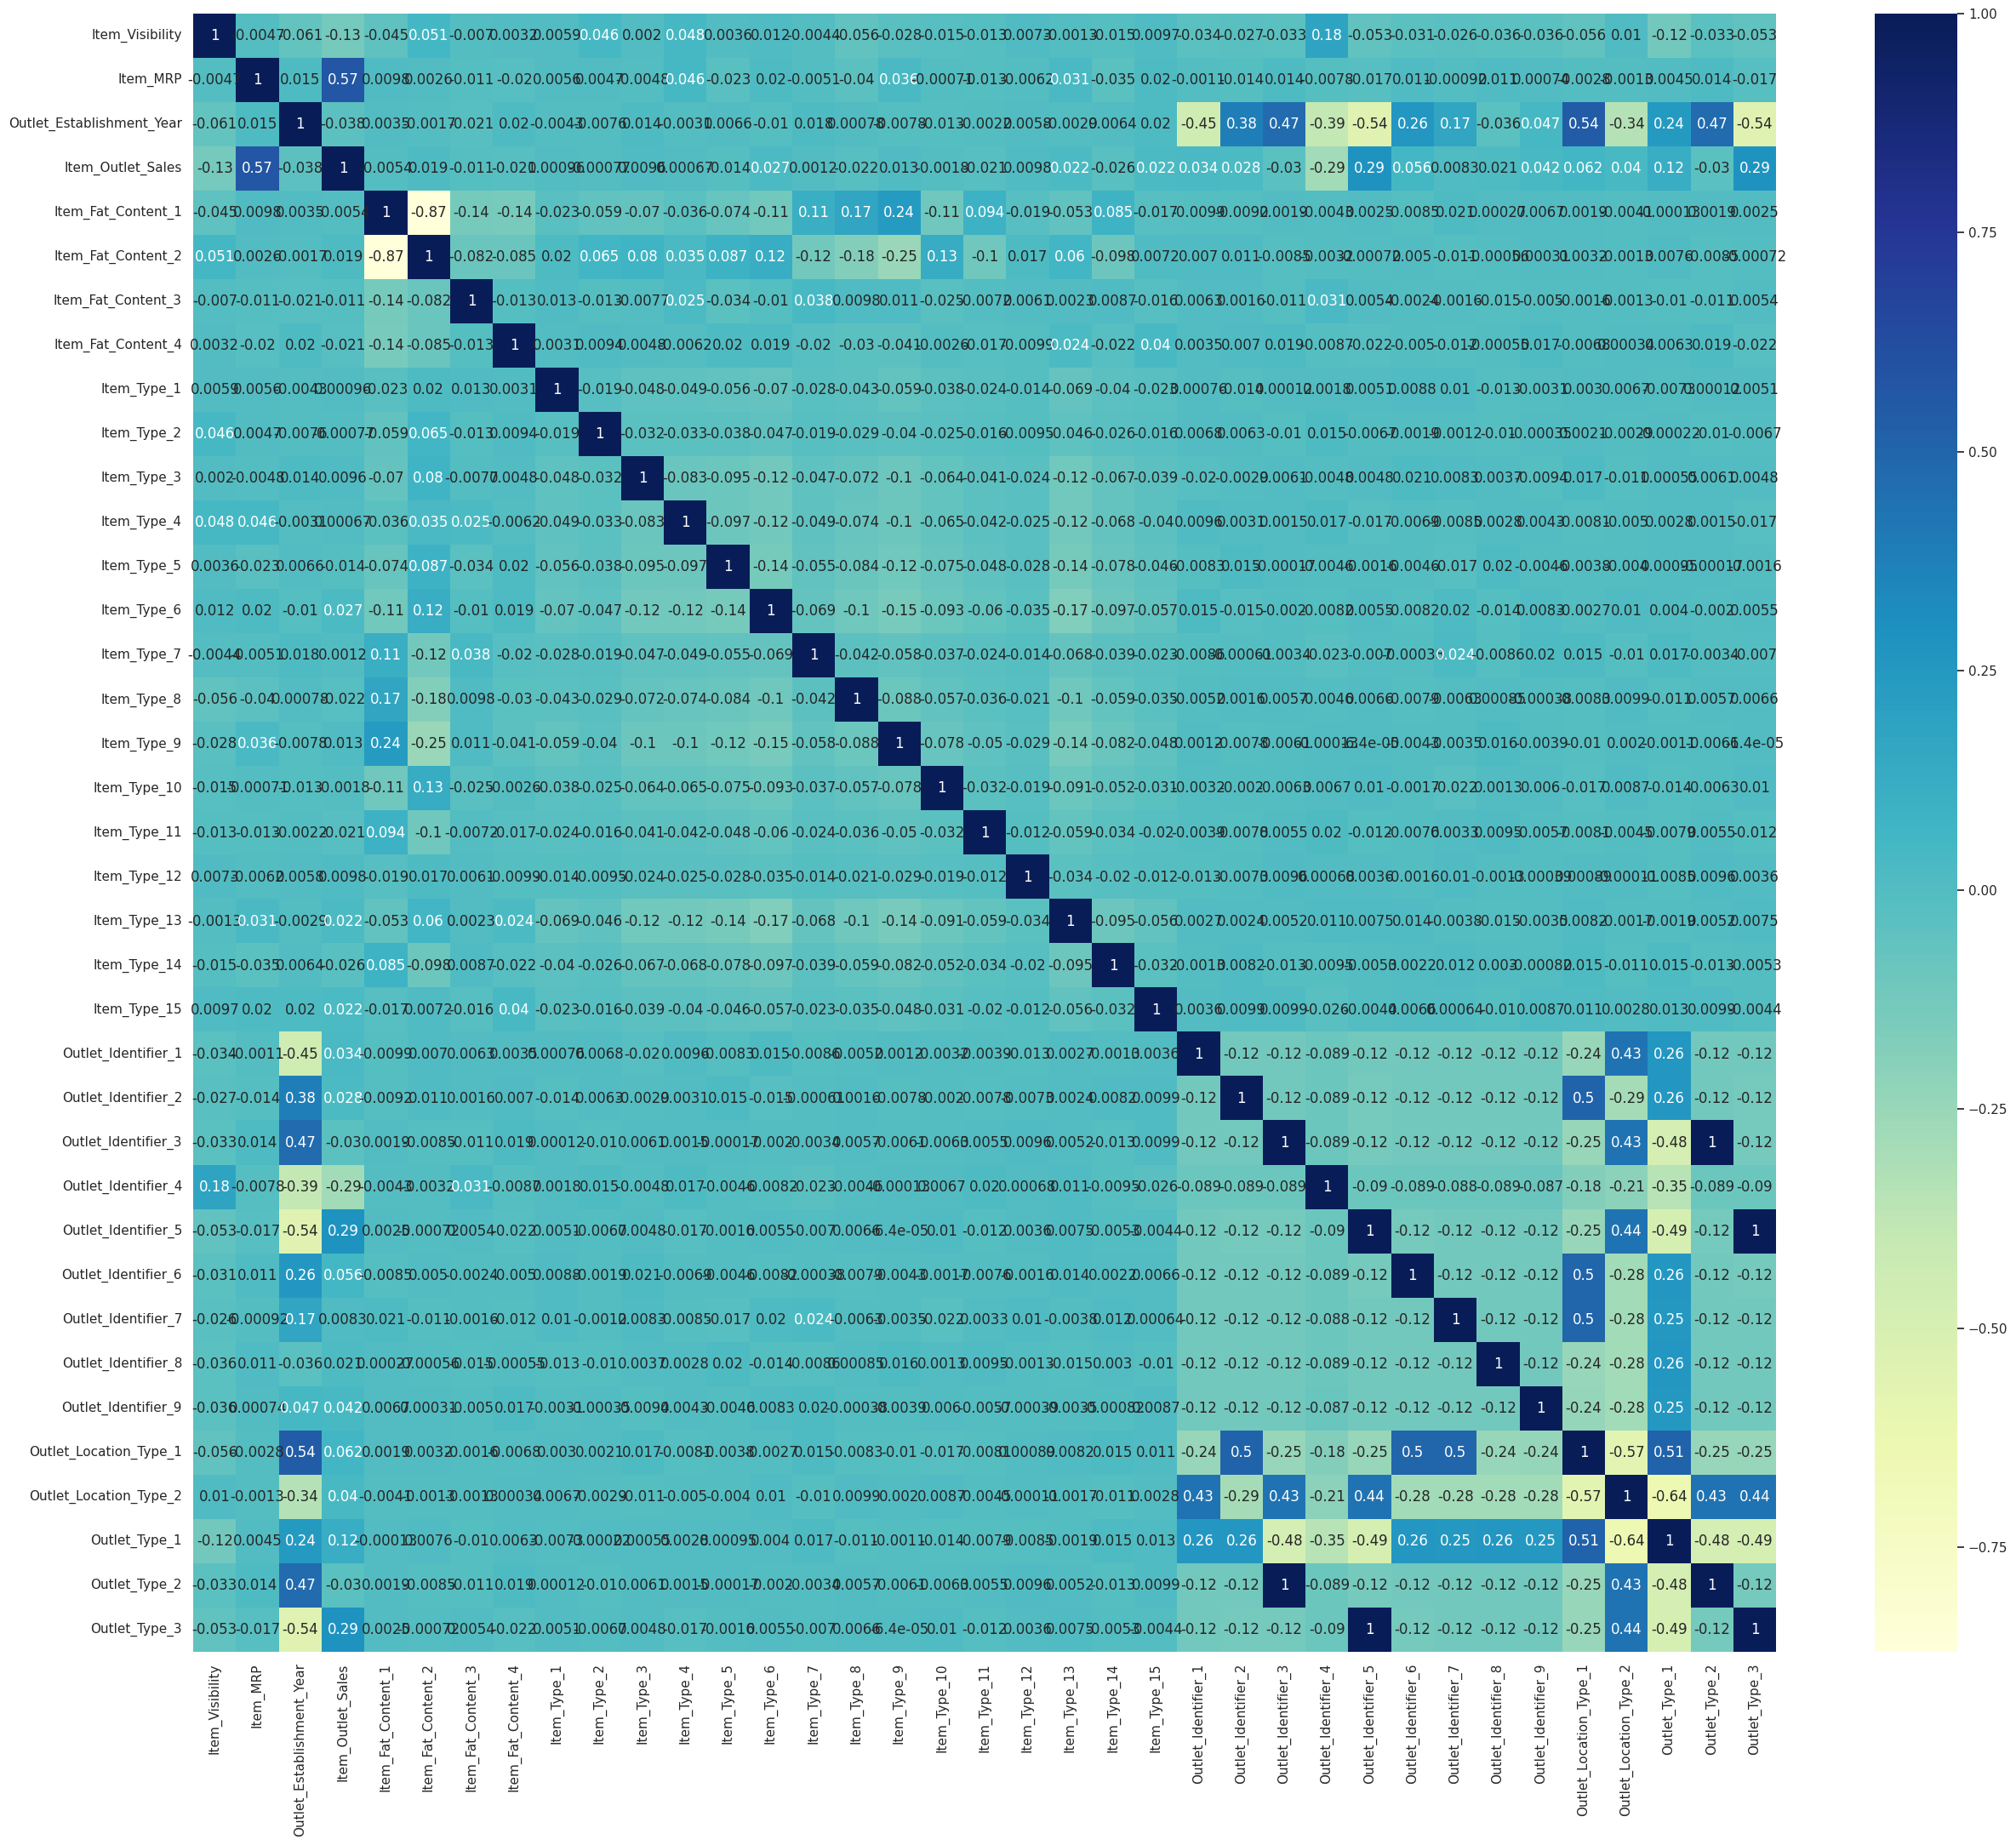

In [969]:
plt.figure(figsize = (30, 25))
sns.heatmap(data_train1.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Modeling

## Data encoded with Label Encoding

In [970]:
y_train = data_train.pop('Item_Outlet_Sales')
X_train = data_train

### Linear regression

In [971]:
lin_reg = LinearRegression()
from sklearn.feature_selection import RFE
lin_reg.fit(X_train,y_train)
rfe = RFE(lin_reg)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Item_Fat_Content', False, 2),
 ('Item_Visibility', True, 1),
 ('Item_Type', False, 5),
 ('Item_MRP', True, 1),
 ('Outlet_Identifier', True, 1),
 ('Outlet_Establishment_Year', False, 4),
 ('Outlet_Location_Type', False, 3),
 ('Outlet_Type', True, 1)]

In [972]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

Item_Visibility  Item_MRP  Outlet_Identifier  Outlet_Type
549          0.179641  0.594464           1.000000     0.333333
7757         0.242236  0.591057           0.777778     0.333333
764          0.388418  0.341387           0.888889     0.333333
6867         0.152288  0.043819           0.777778     0.333333
2716         0.700217  0.527478           0.888889     0.333333

In [973]:
import statsmodels.api as st
X2 = st.add_constant(X_train_rfe)
lin_model=st.OLS(y_train,X2)
result=lin_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.504     
Dependent Variable: Item_Outlet_Sales AIC:                -4180.8999
Date:               2023-08-07 04:32  BIC:                -4146.7633
No. Observations:   6818              Log-Likelihood:     2095.4    
Df Model:           4                 F-statistic:        1732.     
Df Residuals:       6813              Prob (F-statistic): 0.00      
R-squared:          0.504             Scale:              0.031688  
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const               -0.1018   0.0074 -13.7834 0.0000 -0.1163 -0.0873
Item_Visibility     -0.0539   0.0088  -6.1140 0.0000 -0.0712 -0.0366
Item_MRP             0.5461   0.0081  67.2446 0.0000  0.5302  0.5620
Outlet_Identifier    0.0978   0.0069  14.1363 0.0000 

In [974]:
y_test = data_test.pop('Item_Outlet_Sales')
X_test = data_test


In [975]:
y_pred=lin_reg.predict(X_test)
from sklearn.metrics import r2_score
print("Linear Regression R squared of the test set is: {:.2f}".format(r2_score(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.53


### Random Forest

In [976]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [977]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.15660640259315456
R²: 0.5901689698874042


### XGBoost

In [978]:
import xgboost as xgb

In [979]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [980]:
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.16128259267181805
R²: 0.5653288629878741


## Data encoded with One HOt Encoding

In [981]:
y_train1 = data_train1.pop('Item_Outlet_Sales')
X_train1 = data_train1

### Linear regression

In [982]:
lin_reg.fit(X_train1,y_train1)
rfe1 = RFE(lin_reg)
rfe1 = rfe.fit(X_train1, y_train1)
list(zip(X_train1.columns,rfe1.support_,rfe1.ranking_))

[('Item_Visibility', False, 2),
 ('Item_MRP', True, 1),
 ('Outlet_Establishment_Year', True, 1),
 ('Item_Fat_Content_1', False, 13),
 ('Item_Fat_Content_2', False, 3),
 ('Item_Fat_Content_3', False, 5),
 ('Item_Fat_Content_4', True, 1),
 ('Item_Type_1', False, 8),
 ('Item_Type_2', False, 14),
 ('Item_Type_3', False, 16),
 ('Item_Type_4', True, 1),
 ('Item_Type_5', False, 11),
 ('Item_Type_6', False, 15),
 ('Item_Type_7', False, 19),
 ('Item_Type_8', False, 18),
 ('Item_Type_9', False, 10),
 ('Item_Type_10', False, 12),
 ('Item_Type_11', False, 7),
 ('Item_Type_12', True, 1),
 ('Item_Type_13', False, 9),
 ('Item_Type_14', False, 4),
 ('Item_Type_15', False, 17),
 ('Outlet_Identifier_1', True, 1),
 ('Outlet_Identifier_2', True, 1),
 ('Outlet_Identifier_3', True, 1),
 ('Outlet_Identifier_4', True, 1),
 ('Outlet_Identifier_5', True, 1),
 ('Outlet_Identifier_6', True, 1),
 ('Outlet_Identifier_7', False, 6),
 ('Outlet_Identifier_8', True, 1),
 ('Outlet_Identifier_9', True, 1),
 ('Outlet_Loca

In [983]:
X_train_rfe1 = X_train1[X_train1.columns[rfe.support_]]
X_train_rfe1.head()

Item_MRP  Outlet_Establishment_Year  Item_Fat_Content_4  Item_Type_4  \
549   0.594464                   0.583333                 0.0          0.0   
7757  0.591057                   0.708333                 0.0          0.0   
764   0.341387                   0.500000                 0.0          0.0   
6867  0.043819                   0.708333                 0.0          0.0   
2716  0.527478                   0.500000                 0.0          0.0   

      Item_Type_12  Outlet_Identifier_1  Outlet_Identifier_2  \
549            0.0                  0.0                  0.0   
7757           0.0                  0.0                  0.0   
764            0.0                  0.0                  0.0   
6867           0.0                  0.0                  0.0   
2716           0.0                  0.0                  0.0   

      Outlet_Identifier_3  Outlet_Identifier_4  Outlet_Identifier_5  \
549                   0.0                  0.0                  0.0   
7757                  0.0                  0.0                  0.0   
764                   0.0                  0.0                  0.0   
6867                  0.0                  0.0                  0.0   
2716                  0.0                  0.0                  0.0   

      Outlet_Identifier_6  Outlet_Identifier_8  Outlet_Identifier_9  \
549                   0.0                  0.0                  1.0   
7757                  0.0                  0.0                  0.0   
764                   0.0                  1.0                  0.0   
6867                  0.0                  0.0                  0.0   
2716                  0.0                  1.0                  0.0   

      Outlet_Location_Type_1  Outlet_Location_Type_2  Outlet_Type_1  \
549                      0.0                     0.0            1.0   
7757                     1.0                     0.0            1.0   
764                      0.0                     0.0            1.0   
6867                     1.0                     0.0            1.0   
2716                     0.0                     0.0            1.0   

      Outlet_Type_2  Outlet_Type_3  
549             0.0            0.0  
7757            0.0            0.0  
764             0.0            0.0  
6867            0.0            0.0  
2716            0.0            0.0

In [984]:
X3 = st.add_constant(X_train_rfe1)
lin_model=st.OLS(y_train1,X3)
result=lin_model.fit()
print(result.summary2())

                                          Results: Ordinary least squares
Model:                               OLS                              Adj. R-squared:                    0.572     
Dependent Variable:                  Item_Outlet_Sales                AIC:                               -5173.3045
Date:                                2023-08-07 04:32                 BIC:                               -5077.7220
No. Observations:                    6818                             Log-Likelihood:                    2600.7    
Df Model:                            13                               F-statistic:                       700.7     
Df Residuals:                        6804                             Prob (F-statistic):                0.00      
R-squared:                           0.572                            Scale:                             0.027359  
------------------------------------------------------------------------------------------------------------------

In [985]:
y_test1 = data_test1.pop('Item_Outlet_Sales')
X_test1 = data_test1

In [986]:
y_pred1=lin_reg.predict(X_test1)
from sklearn.metrics import r2_score
print("Linear Regression R squared of the test set is: {:.2f}".format(r2_score(y_test1, y_pred1)))

Linear Regression R squared of the test set is: 0.59


### Random Forest


In [987]:
rf_model.fit(X_train1, y_train1)



RandomForestRegressor()

In [988]:
y_pred1 = rf_model.predict(X_test1)
rmse = mean_squared_error(y_test1, y_pred1, squared=False)
r2 = r2_score(y_test1, y_pred1)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.1589733954121981
R²: 0.5776867466651132


### XGBoost

In [989]:
xgb_model.fit(X_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [990]:
y_pred1 = xgb_model.predict(X_test1)
rmse = mean_squared_error(y_test1, y_pred1, squared=False)
r2 = r2_score(y_test1, y_pred1)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.16239052423272557
R²: 0.5593363998018888


# Final Predictions On The Test Dataset

In [991]:
df_test=pd.read_csv('Test.csv')

In [992]:
columns_to_drop = ['Item_Weight', 'Item_Identifier','Outlet_Size']
df_test = df_test.drop(columns=columns_to_drop, axis=1)

In [993]:
colonnes_categorielles = df_test.select_dtypes(include='object').columns.tolist()
colonnes_categorielles

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [994]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(df_test[colonnes_categorielles])
encoded_col_names = []
for i, col in enumerate(colonnes_categorielles):
    categories = encoder.categories_[i]
    encoded_col_names.extend([f'{col}_{category}' for category in categories[1:]])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_col_names)
X_numerical = df_test.drop(columns=colonnes_categorielles)
X_complete = pd.concat([X_numerical, X_encoded_df], axis=1)
X_complete

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0            0.007565  107.8622                       1999   
1            0.038428   87.3198                       2007   
2            0.099575  241.7538                       1998   
3            0.015388  155.0340                       2007   
4            0.118599  234.2300                       1985   
...               ...       ...                        ...   
5676         0.013496  141.3154                       1997   
5677         0.142991  169.1448                       2009   
5678         0.073529  118.7440                       2002   
5679         0.000000  214.6218                       2007   
5680         0.104720   79.7960                       2002   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                          1.0                       0.0   
1                          0.0                       0.0   
2                          1.0                       0.0   
3                          1.0                       0.0   
4                          0.0                       1.0   
...                        ...                       ...   
5676                       0.0                       1.0   
5677                       0.0                       1.0   
5678                       1.0                       0.0   
5679                       0.0                       1.0   
5680                       0.0                       1.0   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Breads  \
0                          0.0                   0.0               0.0   
1                          0.0                   1.0               0.0   
2                          0.0                   0.0               0.0   
3                          0.0                   0.0               0.0   
4                          0.0                   0.0               0.0   
...                        ...                   ...               ...   
5676                       0.0                   0.0               0.0   
5677                       0.0                   0.0               0.0   
5678                       0.0                   0.0               0.0   
5679                       0.0                   0.0               0.0   
5680                       0.0                   0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  ...  Outlet_Identifier_OUT027  \
0                     0.0               0.0  ...                       0.0   
1                     0.0               0.0  ...                       0.0   
2                     0.0               0.0  ...                       0.0   
3                     0.0               0.0  ...                       0.0   
4                     0.0               0.0  ...                       1.0   
...                   ...               ...  ...                       ...   
5676                  0.0               0.0  ...                       0.0   
5677                  0.0               0.0  ...                       0.0   
5678                  0.0               0.0  ...                       0.0   
5679                  0.0               1.0  ...                       0.0   
5680                  0.0               1.0  ...                       0.0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
5676                       0.0                       0.0   
5677                       0.0                       0.0   
5678                       0.0                       1.0   
5679                       0.0                       0.0   
5680                       0.0                       1

In [995]:
scaler = MinMaxScaler()
column =X_complete.columns
X_complete[column] = scaler.fit_transform(X_complete[column])

In [996]:
X_complete

Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0            0.023374  0.323413                   0.583333   
1            0.118737  0.235849                   0.916667   
2            0.307674  0.894140                   0.541667   
3            0.047548  0.524488                   0.916667   
4            0.366458  0.862069                   0.000000   
...               ...       ...                        ...   
5676         0.041702  0.466011                   0.500000   
5677         0.441825  0.584637                   1.000000   
5678         0.227194  0.369798                   0.708333   
5679         0.000000  0.778487                   0.916667   
5680         0.323573  0.203778                   0.708333   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                          1.0                       0.0   
1                          0.0                       0.0   
2                          1.0                       0.0   
3                          1.0                       0.0   
4                          0.0                       1.0   
...                        ...                       ...   
5676                       0.0                       1.0   
5677                       0.0                       1.0   
5678                       1.0                       0.0   
5679                       0.0                       1.0   
5680                       0.0                       1.0   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Breads  \
0                          0.0                   0.0               0.0   
1                          0.0                   1.0               0.0   
2                          0.0                   0.0               0.0   
3                          0.0                   0.0               0.0   
4                          0.0                   0.0               0.0   
...                        ...                   ...               ...   
5676                       0.0                   0.0               0.0   
5677                       0.0                   0.0               0.0   
5678                       0.0                   0.0               0.0   
5679                       0.0                   0.0               0.0   
5680                       0.0                   0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  ...  Outlet_Identifier_OUT027  \
0                     0.0               0.0  ...                       0.0   
1                     0.0               0.0  ...                       0.0   
2                     0.0               0.0  ...                       0.0   
3                     0.0               0.0  ...                       0.0   
4                     0.0               0.0  ...                       1.0   
...                   ...               ...  ...                       ...   
5676                  0.0               0.0  ...                       0.0   
5677                  0.0               0.0  ...                       0.0   
5678                  0.0               0.0  ...                       0.0   
5679                  0.0               1.0  ...                       0.0   
5680                  0.0               1.0  ...                       0.0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
5676                       0.0                       0.0   
5677                       0.0                       0.0   
5678                       0.0                       1.0   
5679                       0.0                       0.0   
5680                       0.0                       1

In [997]:
y_pred=lin_reg.predict(X_complete2)

ValueError: ignored